## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

Computed.

... via scatterplot?

It would help about 50%

(68.023258993556226, 23.249321436660576)
Pearson Correlation: 0.508736478973
Spearman Correlation: 0.540584626232


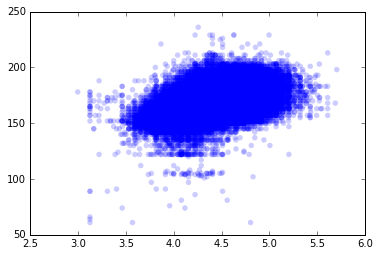

In [39]:
data = data.dropna(subset=['wtkg2', 'htm3'])
logwgt = np.log(data.wtkg2)
inter, slope = thinkstats2.LeastSquares(logwgt, data.htm3)
print (inter, slope)
fit_xs, fit_ys = thinkstats2.FitLine(logwgt, inter, slope)
thinkplot.Scatter(logwgt, data.htm3)
print 'Pearson Correlation: ' + str(thinkstats2.Corr(data.wtkg2, data.htm3))
print 'Spearman Correlation: ' + str(thinkstats2.SpearmanCorr(data.wtkg2, data.htm3))

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

"Estimated parameters would probably be pretty sketchy, but I would generate a standard error and confidence interval. \nHeight would be helpful in getting to the right ballpark for weight, but it doesn't describe unknown variables like diet and exercise"

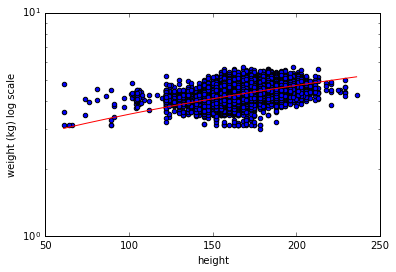

In [6]:
heights, weights = df.htm3, df.wtkg2

#expect log(weight) to be function of height
inter, slope =thinkstats2.LeastSquares(heights,np.log(weights))
fit_xs, fit_ys = thinkstats2.FitLine(heights, inter, slope)
plt.plot(fit_xs, fit_ys, 'r')
plt.scatter(heights,np.log(weights))
plt.yscale('log')
plt.ylabel('weight (kg) log scale')
plt.xlabel('height')
plt.show

"""Estimated parameters would probably be pretty sketchy, but I would generate a standard error and confidence interval. 
Height would be helpful in getting to the right ballpark for weight, but it doesn't describe unknown variables like diet and exercise"""

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

### Imports and filter data for NaN's

In [11]:
import thinkstats2
import thinkplot
import brfss
import seaborn
import math
import numpy
import numpy as np
import pandas as pd
df = brfss.ReadBrfss()
df = df.dropna()
weight = [float(x) for x in df.finalwt]
weight_log = [math.log(x) for x in weight]

df['logweight'] = weight_log





### Function Definitions

In [12]:
#Covariance

def Cov(xs, ys, meanx=None, meany=None):
    xs = np.asarray(xs)
    ys = np.asarray(ys)

    if meanx is None:
        meanx = np.mean(xs)
    if meany is None:
        meany = np.mean(ys)

    cov = np.dot(xs-meanx, ys-meany) / len(xs)
    return cov


#Pearson's Correlation
def Corr(xs, ys):
    #xs_filtered = xs[(~xs.isnull()) & (~ys.isnull())]
    #ys_filtered = ys[(~xs.isnull()) & (~ys.isnull())]
    
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    meanx, varx = np.mean(xs), np.var(xs)
    meany, vary = np.mean(ys), np.var(ys)
    
    #use covariance  function to find Pearson's Correlation
    corr = Cov(xs, ys, meanx, meany) / math.sqrt(varx * vary)
    return corr
 

def LeastSquares(xs, ys):
    meanx, varx = np.mean(xs), np.var(xs)
    meany = np.mean(ys)

    slope = Cov(xs, ys, meanx, meany) / varx
    inter = meany - slope * meanx

    return inter, slope
def FitLine(xs, inter, slope):
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys

def Residuals(xs, ys, inter, slope):
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    res = ys - (inter + slope * xs)
    return res

def SamplingDistributions(live, iters=101):
    t = []
    for _ in range(iters):
        sample = thinkstats2.ResampleRows(live)
        weight_log = sample.logweight
        height = sample.htm3
        estimates = thinkstats2.LeastSquares(weight_log, height)
        t.append(estimates)

    inters, slopes = zip(*t)
    return inters, slopes

def PlotConfidenceIntervals(xs, inters, slopes,
                            percent=90, **options):
    fys_seq = []
    for inter, slope in zip(inters, slopes):
        fxs, fys = FitLine(xs, inter, slope)
        fys_seq.append(fys)

    p = (100 - percent) / 2
    percents = p, 100 - p
    low, high = thinkstats2.PercentileRows(fys_seq, percents)
    thinkplot.FillBetween(fxs, low, high, **options)
    thinkplot.Show()



In [13]:
weight = [float(x) for x in df.finalwt]
weight_log = [math.log(x) for x in weight]

df['logweight'] = weight_log

height = df.htm3

inter, slope = LeastSquares(weight_log, height)
fit_weight, fit_height = FitLine(weight_log, inter, slope)

print "fit_weight =" + str(fit_weight)
print "fit_height =" + str(fit_height)

print "inter =" + str(inter)
print "slope =" + str(slope)

fit_weight =[  0.52776687   0.66247647   0.71614406 ...,  10.67297325  10.77210391
  11.018549  ]
fit_height =[ 164.37951627  164.50526622  164.55536432 ...,  173.84995567  173.94249305
  174.17254686]
inter =163.886851663
slope =0.933489081783


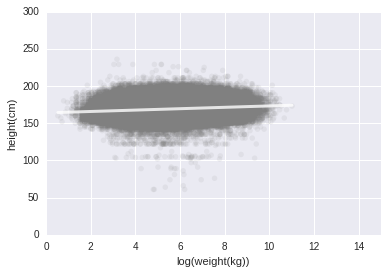

In [14]:
thinkplot.Scatter(df.logweight, df.htm3, color='gray', alpha=0.1)
thinkplot.Plot(fit_weight, fit_height, color='white', linewidth=3)
thinkplot.Plot(fit_height, fit_weight, color='blue', linewidth=2)
thinkplot.Show(root='linear1',
                xlabel='log(weight(kg))',
                ylabel='height(cm)',
                axis=[0, 15, 0, 300],
                legend=False)


In [15]:
resids = Residuals(weight_log, height, inter, slope)
print resids

[-11.76437819  -5.40592497   0.27899756 ...,  11.28827673  -9.1410916
  11.07211737]


### Plot Residuals

Unsure why graph is not showing any data.

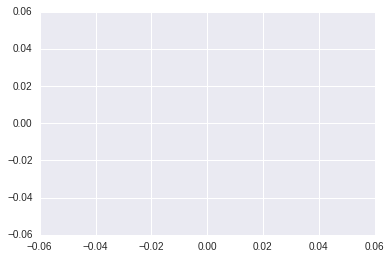

In [16]:
df['residual'] = resids

bins = np.arange(10, 250, 3)
indices = np.digitize(weight_log, bins)
groups = df.groupby(indices)

#weight_logs = [weight_log.mean() for _, group in groups][1:-1]
#weight_logs = [mean(x) for x in weight_logs]
weight_logs = [group.logweight.mean() for _, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for _, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    height = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(weight_logs, height, label=label)

#thinkplot.Show(xlabel='weight kg',ylabel='residual (cms)', xlim=[10, 400])
thinkplot.Show()


### Sampling Distribution

In [17]:
(inters, slopes) = SamplingDistributions(df, iters=101)


### 90% Confidence Interval

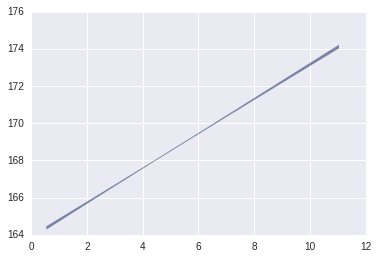

In [18]:
PlotConfidenceIntervals(weight_log, inters, slopes, percent=90)

Independent variable is log transformed
A linear regression model with one log-transformed predictor variable can be expressed with the
following equation:

Y = B0+B1*ln(X1)+B2X2

Source: https://www.cscu.cornell.edu/news/statnews/stnews83.pdf




## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import brfss
df = brfss.ReadBrfss()
print df.head()

   age  sex    wtyrago      finalwt  wtkg2  htm3
0   82    2  76.363636   185.870345  70.91   157
1   65    2  72.727273   126.603027  72.73   163
2   48    2        NaN   181.063210    NaN   165
3   61    1  73.636364   517.926275  73.64   170
4   26    1  88.636364  1252.624630  88.64   185


In [3]:
import numpy as np
df_clean = df.dropna(subset=['wtkg2', 'htm3'])
heights = df_clean.htm3
weights = df_clean.wtkg2
logweights = np.log(weights)
print logweights
print heights

0         4.261411
1         4.286754
3         4.299188
4         4.484583
5         4.692173
6         3.912023
7         4.809987
8         4.499810
9         4.347306
10        4.153242
11        4.359014
12        4.138840
13        4.846311
14        4.558603
15        4.484583
16        4.509870
17        3.912023
18        4.605170
19        4.286754
20        4.335459
21        4.153242
22        4.015482
23        4.359014
24        4.509870
25        4.274163
26        4.347306
27        4.138840
28        4.079062
29        4.188290
30        4.286754
            ...   
414476    4.426522
414477    4.614229
414478    4.039888
414479    4.254903
414480    4.489647
414481    4.335459
414482    3.938860
414483    4.222151
414484    4.469007
414485    4.347306
414486    4.116758
414488    4.627616
414489    4.458525
414490    4.274163
414492    4.254903
414493    4.039888
414494    4.222151
414495    4.286754
414496    4.039888
414497    4.188290
414498    4.317488
414499    4.

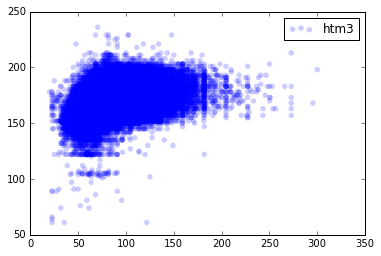

In [4]:
import thinkstats2
import thinkplot

thinkplot.Scatter(weights, heights)
thinkplot.show()

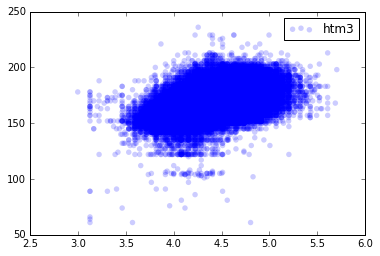

In [5]:
thinkplot.Scatter(logweights, heights)
thinkplot.show()

In [6]:
print thinkstats2.LeastSquares(weights, heights)
inter, slope = thinkstats2.LeastSquares(logweights, heights)
print inter, slope

(147.58094074007394, 0.27042072695863467)
68.0232589936 23.2493214367


For the log weights and heights the intercept was 68.7cm and slope was 23.1cm per log pound. This means that when the log weight is 0 this means that the height is 68.7cm which doesn't really make sense. We will fit this line better with the average weight.

In [7]:
mean = logweights.mean()
calcHeight = slope* mean + inter
print np.exp(mean), calcHeight # print mean weight and its calculated height

76.8094724943 168.956188484


This means that someone that weights 76.8kg is around 169.0 cm tall. When presenting this data I would probably convert log weights back to normal weights so people can actually understand what is going on.

In [8]:
res = logweights * slope + inter
thinkstats2.CoefDetermination(heights, res)

0.71726505688113296

The R^2 value is around .72 which is not a bad value but it doesn't show a strong correlation between weight and height.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [47]:
from brfss import *
df = ReadBrfss()
print df.head()

   age  sex    wtyrago      finalwt  wtkg2  htm3
0   82    2  76.363636   185.870345  70.91   157
1   65    2  72.727273   126.603027  72.73   163
2   48    2        NaN   181.063210    NaN   165
3   61    1  73.636364   517.926275  73.64   170
4   26    1  88.636364  1252.624630  88.64   185


In [52]:
weights = df.wtkg2.fillna(df.wtkg2.median())
heights = df.htm3.fillna(df.htm3.median())
logweights = np.log(weights)
print logweights
print weights

0         4.261411
1         4.286754
2         4.347306
3         4.299188
4         4.484583
5         4.692173
6         3.912023
7         4.809987
8         4.499810
9         4.347306
10        4.153242
11        4.359014
12        4.138840
13        4.846311
14        4.558603
15        4.484583
16        4.509870
17        3.912023
18        4.605170
19        4.286754
20        4.335459
21        4.153242
22        4.015482
23        4.359014
24        4.509870
25        4.274163
26        4.347306
27        4.138840
28        4.079062
29        4.188290
            ...   
414479    4.254903
414480    4.489647
414481    4.335459
414482    3.938860
414483    4.222151
414484    4.469007
414485    4.347306
414486    4.116758
414487    4.347306
414488    4.627616
414489    4.458525
414490    4.274163
414491    4.347306
414492    4.254903
414493    4.039888
414494    4.222151
414495    4.286754
414496    4.039888
414497    4.188290
414498    4.317488
414499    4.864067
414500    4.

I used fillna instead of dropna because dropping the NaNs from both the weights and heights left them different lengths, which errored on LeastSquares.  This was the easiest way I could think of to make sure their lengths matched, is there another/better way?

In [57]:
import thinkstats2
import thinkplot

inter, slope = thinkstats2.LeastSquares(logweights, heights)
print inter, slope

68.697063567 23.0637498958


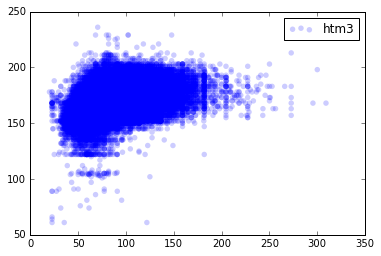

In [49]:
thinkplot.Scatter(weights, heights)
thinkplot.Show()

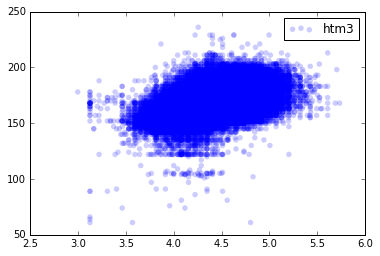

In [50]:
thinkplot.Scatter(logweights, heights)
thinkplot.Show()

This tells me that the intercept the about 68.7cm and the slope is about 23cm per log-pound, which means that when your weight is 0, your height will be 68.7 cm (which doesn't make much sense), and you gain 23cm per log-pound, which is also hard for a person to interpret.

To fix the intercept issue, we can use the intercept at the mean of the data instead:

In [54]:
m = logweights.mean()
print weights.mean(), np.exp(m) # these should be the same, or close
print m
print 68.7 + 23*m

78.925862623 76.7765533047
4.34089929803
168.540683855


This is at least easier to interpret - at the mean of 4.34 log-kg, or about 77 kg, the height intercept is 168cm, which makes sense to a human.  The difference between finding the mean and then making it an exponential to offset the log, or just taking the mean of the original weights is off by a few kg, likely due to rounding of the mean.

What the Least Squares tells us is that the least-squares fit line is at the equation:
height = 23 * ln(weight) + 68.7

A linear model will be saying that every time the weight increased by x kgs, the height should increase by y cm.  A log model can be explained instead of using these definite values, using percentages.  Every time the weight increases by, say, 5%, the height will increase by 23 * ln(1.05), or 1.12cm.  This works no matter the weight:

In [56]:
weight1 = 65
weight2 = weight1*1.05 #increase by 5%
height1 = 23 * np.log(weight1) + 68.7
height2 = 23 * np.log(weight2) + 68.7
print height2 - height1 # should be 1.12

1.1221737759


As you can see by entering different values for weight1, the difference in heights between that and the weight 5% more is always 1.12cm.  This is a good way to explain this model to people, because people are not very well able to think in logs of their weight, but they would likely be able to think in percentage increases.  And 5% is just an example, maybe 10% would be a better way to actually explain the model because 10% is so easy to calculate in your head (moving the decimal place), so we could say that each 10% increase in weight correlates to a 2.2cm increase in height.

Just from looking at the scatterplots, we know that although there does seem to be a positive correlation between height and weight, it's not very strong and there's a lot of noise.

In [60]:
print thinkstats2.CoefDetermination(heights, thinkstats2.Residuals(logweights, heights, inter, slope))

0.273288464105


What this R^2 values tells us is that about 27% of the variation of the residuals (deviants from the best-fit line) can be explained by the relationship between heights and the log of weights.  This is okay, but not really super strong, so if I were trying to guess a friend's height based on their weight, I wouldn't put a lot of money on my prediction.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

The key part in presenting these estimated parameters is noting that because we log-transformed the heights, there's not as much of a physical meaning to the estimated slope. In this sense, it's not super helpful of a model for patients themselves to learn anything from. No one is really thinking about the log of their weight, but maybe they should be! New diet fad!

68.0232589936 23.2493214367
[ 2.99573227  3.12368564  3.12368564 ...,  5.60848229  5.68849962
  5.70378247] [ 137.67200156  140.64683046  140.64683046 ...,  198.41666664  200.2770151
  200.63233115]


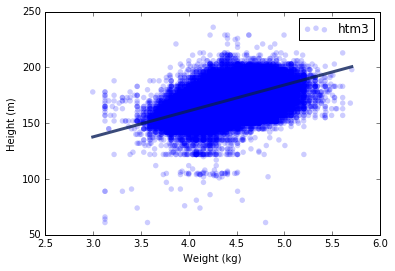

In [20]:
import brfss
import thinkstats2 as ts
import numpy as np
import thinkplot

df = brfss.ReadBrfss()

# print df.describe()

df = df.dropna(subset=['wtkg2','htm3'])

weights = df.wtkg2.apply(lambda x: np.log(x))
heights = df.htm3

# print weights

inter, slope = ts.LeastSquares(weights, heights)
fit_xs, fit_ys = ts.FitLine(weights, inter, slope)

print inter, slope
print fit_xs, fit_ys

thinkplot.Scatter(weights, heights)
thinkplot.plot(fit_xs, fit_ys)
thinkplot.Show(xlabel='Weight (kg)',
               ylabel='Height (m)',
               alpha=0.2)

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import brfss
import numpy as np
import thinkstats2
import thinkplot

In [3]:
#Read the data 
df = brfss.ReadBrfss(nrows=None)
df.columns

Index([u'age', u'sex', u'wtyrago', u'finalwt', u'wtkg2', u'htm3'], dtype='object')

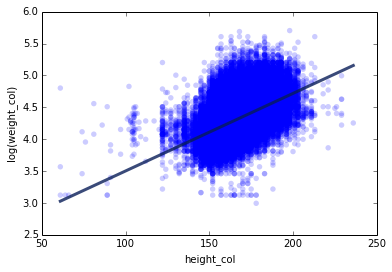

In [4]:
#Null the columns we want to use
df = df.dropna(subset=['htm3', 'wtkg2'])

weight_col = df.wtkg2
height_col = df.htm3
weight_col = np.log(weight_col)

#Compute the slope and intercept
intercept, slope = thinkstats2.LeastSquares(height_col, weight_col)

#Plot the scatter data 
thinkplot.Scatter(height_col, weight_col)
x,y = thinkstats2.FitLine(height_col, intercept, slope)
thinkplot.Plot(x,y)
thinkplot.Config(xlabel='height_col', ylabel='log(weight_col)', legend=False)

0.0405071292926


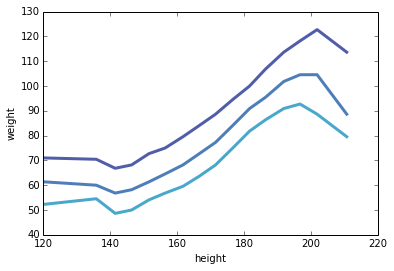

In [6]:
"""Calculating Residuals and checking
if a linear relationship exits"""
res = thinkstats2.Residuals(height_col, weight_col, intercept, slope)
MSE = sum(res**2)/len(res)
print MSE

bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.wtkg2) for i, group in groups]

for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights, weights, label=label)

thinkplot.Config(xlabel='height', ylabel='weight', legend=False)

The correlation between log of weight and height between 140 cm and 160 cm is pretty linear. So I would say, within that range, knowing the height can help with guessing the weight. For other parts of the graph, I would say other factors like diet, exercise, etc will come into consideration.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

### Computing the linear least squares fit for log(weight) versus height

Assuming that the log(weight) mentioned in the prompt is the log base 10.

page 127 of ThinkStats2: "If there is a linear relationship between `xs` and `ys` with intercept `inter` and slope `slope`,     
we expect each `y[i]` to be `inter + slope * x[i]`"

So, according to the exercise prompt, we're looking at this relationship (using height and weight as pseudocode words):    
`log10(weight[i]) = inter + slope * height[i]`

In [188]:
import brfss as b
import numpy as np
import thinkstats2
import math
import seaborn as sns
sns.set(color_codes=True)

In [189]:
brfss_df = b.ReadBrfss()

[Found the descriptions in the 2009 codebook](http://www.cdc.gov/brfss/annual_data/2009/pdf/codebook_09.pdf)

Feature descriptions: 
* age = Reported Age in years
* sex = Respondent's Sex (1 for male, 2 for female)
* wtyrago = Reported Weight year ago in lbs
* finalwt = Final Weight
* wtkg2	= Computed Weight in kg
* htm3 = Computed Height in cm


In [190]:
brfss_df = brfss_df.dropna(subset=['htm3', 'wtkg2'])
heights = brfss_df['htm3']
weights = brfss_df['wtkg2']

In [191]:
log_weights = weights.copy()
log_weights = np.log10(log_weights)

In [192]:
print "Checking to make sure the log_weights seem reasonable \n"
print weights[0:10], "\n \n", log_weights[0:10] 

Checking to make sure the log_weights seem reasonable 

0      70.91
1      72.73
3      73.64
4      88.64
5     109.09
6      50.00
7     122.73
8      90.00
9      77.27
10     63.64
Name: wtkg2, dtype: float64 
 
0     1.850707
1     1.861714
3     1.867114
4     1.947630
5     2.037785
6     1.698970
7     2.088951
8     1.954243
9     1.888011
10    1.803730
Name: wtkg2, dtype: float64


In [193]:
inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print "inter", inter
print "slope", slope

inter 0.993080416394
slope 0.00528145416942


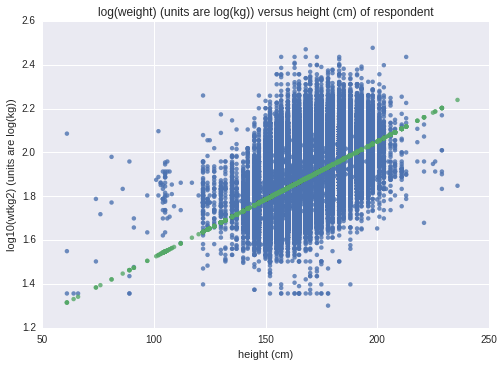

In [194]:
# scatter plot in blue
# setting fit_reg to False to instead use the inter and slope we just calculated
logweights_heights_plot = sns.regplot(x=heights, y=log_weights, fit_reg=False) 

# fit line in green
logweights_heights_fit_line_y = inter + slope * heights;
logweights_heights_plot = sns.regplot(x=heights, y=logweights_heights_fit_line_y, fit_reg=False) 

logweights_heights_plot.axes.set_title("log(weight) (units are log(kg)) versus height (cm) of respondent")
logweights_heights_plot.set_xlabel("height (cm)")
logweights_heights_plot.set_ylabel("log10(wtkg2) (units are log(kg))")

### Presenting the estimated parameters

The scatter plot above is a visualization of `log10(weight)` versus `height` of the respondent. However, this isn't intuitive for a general audience -- most people don't think of their weight and other personal numbers as a `log10` value.    

If you recall our pseudocode/expression for the plot: `log10(weight[i]) = inter + slope * height[i]`     
We can cancel out the log10 so the y axis will be in terms of weight instead of log10(weight).     
The revised pseudocode/expression will be: `weight[i] = 10**(inter + slope * height[i])`

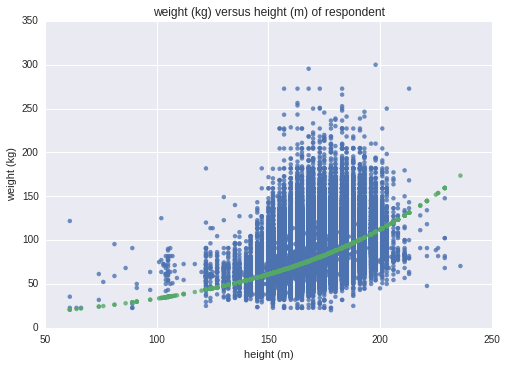

In [195]:
# scatter plot in blue
not_log_plot = sns.regplot(x=heights, y=10**log_weights, fit_reg=False)

# fit line in green
not_log_fit_line_y = 10**(inter + slope * heights)
not_log_plot = sns.regplot(x=heights, y=not_log_fit_line_y, fit_reg=False)

not_log_plot.axes.set_title("weight (kg) versus height (m) of respondent")
not_log_plot.axes.set_xlabel("height (m)")
not_log_plot.axes.set_ylabel("weight (kg)")

The visualization above is more compatible with how people usually talk about weight (kg) and height (cm). Overall, this confirms that as height increases, weight increases, and that the exact relationship between weight and height will vary. It seems that with larger height values, the rate of weight increase is higher compared to the smaller height values.

(Fumbling with the wording a bit here... wanting to not use a bunch of technical words because this paragraph in particular is meant to be towards a more general audience.)

### "If you were trying to guess someone’s weight, how much would it help to know their height?"

At surface level, this question can be interpreted as asking about the quality of the linear model. If the model between height and weight works well (i.e. the line is a good fit to the overall dataset), then it would be very helpful to know the height. We could additionally calculate more numbers to describe the goodness of fit, such as root mean squared error or the coefficient of determination. Although we were able to generate a fit line, it looks like there are many points that are not even close to the fit line (both above and under). This fit line may be good enough for some limited applications (and it is using only one independent variable: height), but future work should investigate different features and models for predicting weight. 

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

________
First we will collect the height and weight data from the brfss file and drop all of the invalid numbers for the height and weight catagories using dropna.
_____
Then we can plot the raw data using a scatter plot and using transparency to give us an idea of what the data looks like

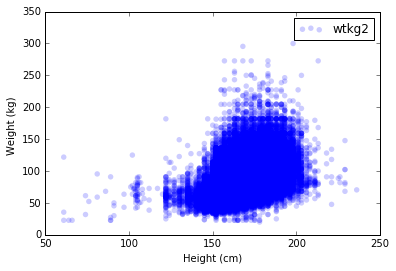

In [32]:
import brfss
import matplotlib.pyplot as plt
import thinkplot
import thinkstats2
import numpy as np

df = brfss.ReadBrfss();
df = df.dropna(subset=['wtkg2', 'htm3'])
thinkplot.Scatter(df.htm3,df.wtkg2)
thinkplot.Show(xlabel='Height (cm)',ylabel='Weight (kg) ', alpha=0.2)

Then we will split up the data. Since we want to observe the log of the weights, we can use the numpy function log10 to operate on the numbers within the weights list. We can use another scatterplot on this data to see the difference with the log weights. Then the Least Squares function is called using our weights and heights to return the intercept and slope of the linear least squares. 

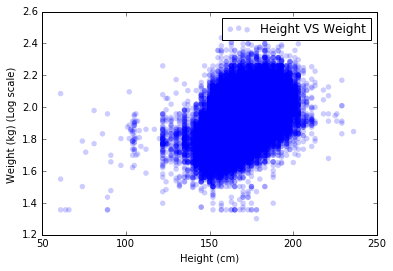

Intercept: 0.993080 	 slope:0.005281


In [33]:
weights = df.wtkg2
weights = np.log10(weights)
heights = df.htm3

thinkplot.Scatter(heights, weights, label="Height VS Weight")
thinkplot.Show(xlabel='Height (cm)',ylabel='Weight (kg) (Log scale) ', alpha=0.2)

inter, slope = thinkstats2.LeastSquares(heights, weights)
print "Intercept: %f \t slope:%f" % (inter,slope)

Next we are going to want to draw the lines of best fit through our graphs 

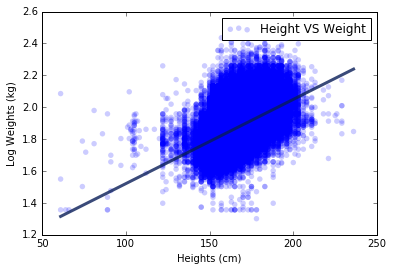

In [34]:
xs, ys = thinkstats2.FitLine(heights, inter, slope)

thinkplot.Scatter(heights, weights, label="Height VS Weight")
thinkplot.Plot(xs, ys)
thinkplot.Show(xlabel="Heights (cm)", ylabel="Log Weights (kg)")

Now let's look into Residuals

1.4695861777e-12


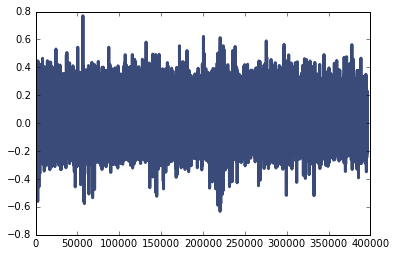

In [35]:
res = thinkstats2.Residuals(heights, weights, inter, slope)
print res.mean()
thinkplot.Plot(res)

In [36]:
corr = thinkstats2.Corr(heights, weights)

print "Corrolation: ", corr

Corrolation:  0.531728260598


n, mean, std 395832 1.88495158731 0.0962215142461


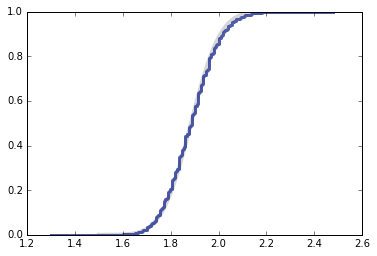

In [37]:
brfss.MakeNormalModel(weights)

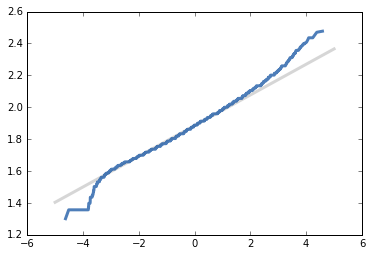

In [38]:
brfss.MakeNormalPlot(weights)

In [39]:
cOfD = thinkstats2.CoefDetermination(weights, res)
print "Coefficient of Determination: ", cOfD

Coefficient of Determination:  0.282734943119


In [40]:
dif = cOfD - corr**2
print dif

7.81041897824e-14


In accordance to the relationship of R^2 == rho^2, where R is the Coefficient of Determination and rho is the Corrolation. We can calculate the difference between those two numbers, which should be around 0. As shown, it is a very small number, verifying the relationship. 

It seems like there is about a 28% corrolation between height and weight

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [26]:
df = brfss.ReadBrfss()
print df

        age  sex     wtyrago      finalwt   wtkg2  htm3
0        82    2   76.363636   185.870345   70.91   157
1        65    2   72.727273   126.603027   72.73   163
2        48    2         NaN   181.063210     NaN   165
3        61    1   73.636364   517.926275   73.64   170
4        26    1   88.636364  1252.624630   88.64   185
5        42    1  118.181818   415.161314  109.09   183
6        40    2   50.000000   422.810541   50.00   157
7        24    2  131.818182  1280.585980  122.73   178
8        37    1   87.727273  1245.060440   90.00   178
9        65    1   77.272727   382.738158   77.27   173
10       28    1   52.272727  3131.561570   63.64   170
11       68    2   86.363636   506.412109   78.18   168
12       40    2   62.727273   422.810541   62.73   175
13       49    1  127.272727   274.170333  127.27   183
14       24    2   95.454545  2561.171960   95.45   175
15       49    2   88.636364   181.063210   88.64   157
16       36    2  113.636364   211.405271   90.9

In [27]:
df = df.dropna(subset=['htm3', 'wtkg2'])
height = df.htm3 
weight = df.wtkg2
logweight = np.log10(weight)
inter, slope = thinkstats2.LeastSquares(height, logweight)
print "Log weight vs height"
print "Intercept: ",inter
print "Slope: ",slope

Log weight vs height
Intercept:  0.993080416392
Slope:  0.00528145416942


In [28]:
inter2, slope2 = thinkstats2.LeastSquares(height, weight)
print "Weight vs height"
print "Intercept: ",inter2
print "Slope: ",slope2

Weight vs height
Intercept:  -82.6592605441
Slope:  0.957074585033


The intercept above is claiming average weight to be -82kg when height is 0, which is apparently not convicing. So we'll turn to look at the intercept at the average height.

In [29]:
avgheight = height.mean()
intercept = avgheight* slope2 + inter2
print "Average height: ",avgheight
print "Interception at average height: ", intercept

Average height:  168.956188484
Interception at average height:  79.044413438


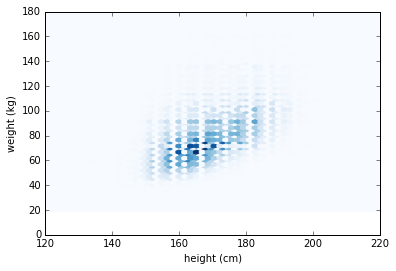

In [30]:
thinkplot.HexBin(height, weight)
thinkplot.Show(xlabel='height (cm)', ylabel='weight (kg)',axis=[120,220,0,180])

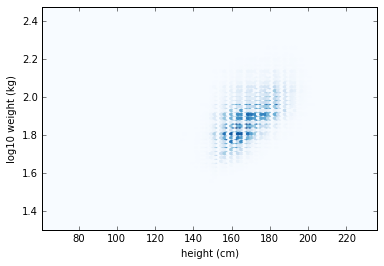

In [31]:
thinkplot.HexBin(height, logweight)
thinkplot.Show(xlabel='height (cm)', ylabel='log10 weight (kg)')

If we want to quantify the correlation between a person's height and his weight, we can also calculate the Spearman's rank between the two variable:

In [32]:
srank = thinkstats2.SpearmanCorr(weight,height)
print "Spearman's rank: ", srank

Spearman's rank:  0.540584626232


As we can see, the value is 0.54, which suggests a person's height plays an important role in finding that person's weight.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import thinkstats2
import numpy as np
import seaborn as sns
import thinkplot
import matplotlib.pyplot as plt

# Calculates the linear least squares fit for the data
def least_squares(xs, ys):
    mean_x, var_x = xs.mean(), xs.var()
    mean_y = ys.mean()
    
    slope = thinkstats2.Cov(xs, ys, mean_x, mean_y) / var_x
    inter = mean_y - slope * mean_x
    
    return inter, slope 

# Cleans the data and calculates the fit
df_clean = df.dropna(subset=['wtkg2', 'htm3'])
heights = df_clean.htm3
weights = np.log(df_clean.wtkg2)
inter, slope = least_squares(heights, weights)

print inter, slope

2.28665735371 0.0121609669172


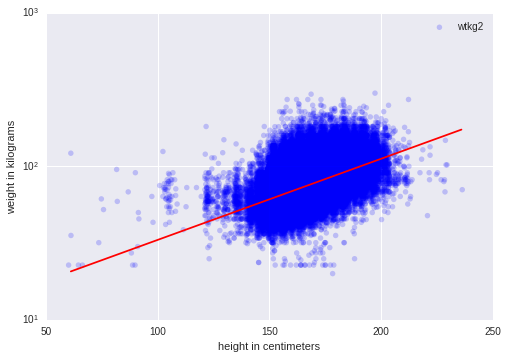

In [3]:
# Plots the scatter plot
thinkplot.scatter(thinkstats2.Jitter(df_clean.htm3, 1), df_clean.wtkg2)

# Draws the line of fit
fit_x_min, fit_x_max = min(heights), max(heights)
fit_y_min, fit_y_max = np.exp(fit_x_min * slope + inter), np.exp(fit_x_max * slope + inter)
plt.plot([fit_x_min, fit_x_max], [fit_y_min, fit_y_max], 'r')

plt.xlabel('height in centimeters')
plt.ylabel('weight in kilograms')
plt.yscale('log')
thinkplot.show()

This visualization of the data and the fitted line does not seem to provide much of an insight into the population. Although there appears to be somewhat of an exponential relationship between height and the weight, the data could probably be better visualized as a 2D probability density plot. One way to check the goodness of fit is to check the $R^2$ value:

In [4]:
# Calculates R^2
ys = weights
res = heights * slope + inter

thinkstats2.CoefDetermination(ys, res)

0.71726648543958005

An $R^2$ value of 0.72 is fairly decent, but the scatterplot is still difficult to interpret. The following hexbin plot visualizes the distribution a bit more clearly.

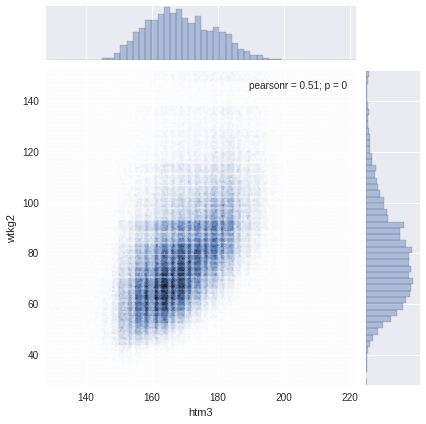

In [27]:
# Hexbin plot after jittering and clipping the data
xs = thinkstats2.Jitter(df_clean.htm3.clip(130, 220), 2)
ys = thinkstats2.Jitter(df_clean.wtkg2.clip(30, 150), 2)
sns.jointplot(x=xs, y=ys, kind="hex")

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [61]:
import brfss
import thinkstats2
import numpy as np
import math

In [39]:
data = brfss.ReadBrfss()
data.head(5)

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,76.363636,185.870345,70.91,157
1,65,2,72.727273,126.603027,72.73,163
2,48,2,NaN,181.063210,NaN,165
3,61,1,73.636364,517.926275,73.64,170
4,26,1,88.636364,1252.624630,88.64,185


The data has 6 columns with the headers: age, sex, weight one year ago, final weight, weight in kg, and height. Next we can check is this data needs cleaning

In [19]:
data.isnull().sum()

age         3653
sex            0
wtyrago    24110
finalwt        0
wtkg2      16025
htm3        5380
dtype: int64

Oh yikes, that means that a lot of the data is null. We can call the clean function in brfss

In [70]:
data = data.dropna(subset = ['age', 'wtyrago', 'wtkg2', 'htm3'])

In [71]:
data.head(5)

,age,sex,wtyrago,finalwt,wtkg2,htm3
0,82,2,34.710744,185.870345,0.7091,157
1,65,2,33.057851,126.603027,0.7273,163
3,61,1,33.471074,517.926275,0.7364,170
4,26,1,40.289256,1252.624630,0.8864,185
5,42,1,53.719008,415.161314,1.0909,183


In [75]:
blah = data.wtkg2.astype(float)

In [77]:
math.log(data.wtkg2)

TypeError: cannot convert the series to <type 'float'>

In [57]:
import math
intecept, slope = thinkstats2.LeastSquares(math.log(data.wtkg2), data.htm3)

TypeError: cannot convert the series to <type 'float'>

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import thinkstats2
import numpy as np
import brfss
import pandas
import matplotlib.pyplot as plt

df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])
df['logwtkg2'] = np.log10(df.wtkg2)

In [3]:
df.describe()

,age,sex,wtyrago,finalwt,wtkg2,htm3,logwtkg2
count,393518.000000,395832.000000,388137.000000,395832.000000,395832.000000,395832.000000,395832.000000
mean,54.891207,1.612730,79.766921,562.527274,79.044413,168.956188,1.885415
std,16.742237,0.487127,20.574880,1076.206594,19.547890,10.390752,0.103207
min,18.000000,1.000000,22.727273,1.695143,20.000000,61.000000,1.301030
25%,43.000000,1.000000,64.545455,97.241254,64.550000,163.000000,1.809896
50%,55.000000,2.000000,77.272727,234.914579,77.270000,168.000000,1.888011
75%,67.000000,2.000000,90.909091,593.585278,90.910000,178.000000,1.958612
max,99.000000,2.000000,342.272727,60995.111700,300.000000,236.000000,2.477121


In [15]:
inter, slope = thinkstats2.LeastSquares(df.htm3,df.logwtkg2)
print "Intercept: " + str(inter)
print "Slope: " + str(slope)

fit_xs, fit_ys = thinkstats2.FitLine(df.htm3, inter, slope)

Intercept: 0.993080416392
Slope: 0.00528145416942


I think that re-transforming the data back into their original units is probably the best way to visually present the results. 

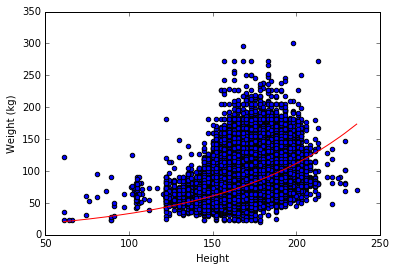

In [14]:
plt.plot(fit_xs, np.power(10, fit_ys),'r')
plt.scatter(df.htm3,df.wtkg2)
plt.ylabel('Weight (kg)')
plt.xlabel('Height')

In [16]:
resid = thinkstats2.Residuals(df.htm3, df.logwtkg2, inter, slope)

In [17]:
print 'RMSE (Without knowing height): ', thinkstats2.Std(df.logwtkg2)
print 'RMSE (With knowing height): ', thinkstats2.Std(resid)
print
print 'R-squared: ', thinkstats2.CoefDetermination(df.logwtkg2, resid)

RMSE (Without knowing height):  0.1032072503
RMSE (With knowing height):  0.0874077708042

R-squared:  0.282734943119


A person's height accounts for 28% of the variance in their weight

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [43]:
from brfss import ReadBrfss
import thinkstats2
import thinkplot
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

df = ReadBrfss(nrows=4200000) #414509 entries in the data
df.info()
#columns as provided by Allen are: age, sex, wtyrago, finalwt, wtkg2, htm3

<class 'pandas.core.frame.DataFrame'>
Int64Index: 414509 entries, 0 to 414508
Data columns (total 6 columns):
age        410856 non-null float64
sex        414509 non-null int64
wtyrago    390399 non-null float64
finalwt    414509 non-null float64
wtkg2      398484 non-null float64
htm3       409129 non-null float64
dtypes: float64(5), int64(1)
memory usage: 22.1 MB


(68.023258993559537, 53.533540962279773)


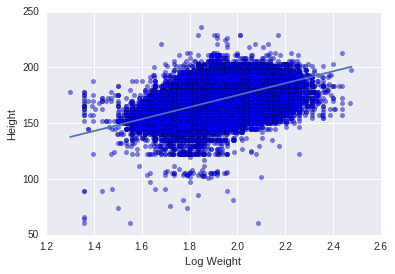

In [44]:
#want to calculate the least squares fit for the log of weight versus height.
df_valid = df.dropna(subset=['htm3','wtkg2'])
log_weight = np.log10(df_valid.wtkg2)
height = df_valid.htm3

lsf = thinkstats2.LeastSquares(log_weight, height)
print lsf #returns intercept, slope

#let's look at the live of fit from this information
fit_x, fit_y = thinkstats2.FitLine(log_weight, lsf[0], lsf[1])

#now, let's plot all this good stuff using matplotlib
plt.scatter(log_weight, height,alpha=0.5)
plt.plot(fit_x, fit_y)
plt.xlabel('Log Weight')
plt.ylabel('Height')

#what does the seaborn version look like?
# ax = sns.regplot(x=log_weight, y=height) << this is very slow

plt.show()

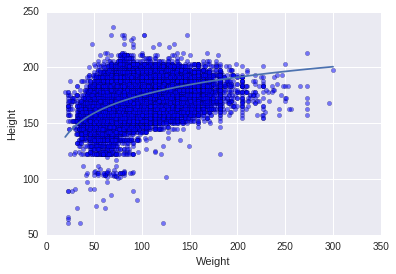

In [45]:
#for reference, let's un-normalize everything, and see what happens...
plt.scatter(df_valid.wtkg2, height,alpha=0.5)
new_fit_x = 10**fit_x
plt.plot(new_fit_x, fit_y)
plt.xlabel('Weight')
plt.ylabel('Height')
plt.show()

To have something that is logged transformed, that means that we can linearize some data that wouldn't necessarily be easily explained with such a relationship. This also means that any linear relationship we see in a log-normalized axis implies that the raw relationship is not in fact linear. Knowing someone's height would then be useful to know for some heights, but not others - in the sense that the shorter the person, the less likely we might be able to predict the weight of the person because there is a higher density of possibilities - whereas for taller folks, the possibilities for weight are perhaps more straightforward.

To look at this model more, I look at the residuals to help understand the relationship further.

/home/vpreston/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


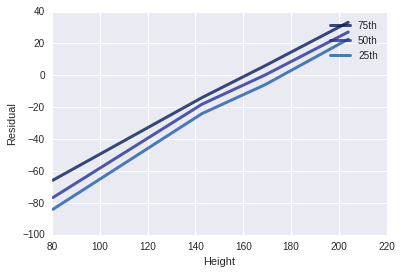

In [46]:
resids = thinkstats2.Residuals(log_weight, height, lsf[0], lsf[1])
df_valid['resids'] = resids #a quick recode to make life easier

#let's group these by percentile as it relates to height, as per the suggestion of Allen
bins = np.arange(50,250,50) #bins of height
indices = np.digitize(height,bins)
groups = df_valid.groupby(indices)

heights = [group.htm3.mean() for i, group in groups]
cdfs = [thinkstats2.Cdf(group.resids) for i, group in groups]

for percent in [75,50,25]:
    plt_resids = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(heights,plt_resids,label=label)

thinkplot.Show(xlabel='Height', ylabel='Residual')

This shows some pretty significant residual for shorter folks, which implies bigger variation, as positied earlier - and this is even with the log(weight) data. The average height of a person gets about an average weight, makes sense. And there is smaller variability in taller folks. 

Even with log(weight) then, which appears to be a much more linear data set, the fit of a least squares fit is perhaps not the most appropriate.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [5]:
import brfss
import numpy as np
import pandas as pd
import thinkstats2
import thinkplot
import math
df = brfss.ReadBrfss(nrows=None)
df = df.dropna(subset=["wtkg2","htm3"])

## Compute the linear least squares fit for log(weight) versus height


I will first use Allen's LeastSquares function to compute the inter and slope for the estimated linear equation. And the average height and estimated weight to make the estimation more understandable. While computing the linear least squares fit, I will also use the covariance function we used before.



In [44]:
def LeastSquares(xs, ys):
    """
    Given two pairs of squences xs and ys,
    returns the estimated interception and slope 
    of the linear least square fit
    """
    meanx = xs.mean()
    varx = xs.var()
    meany = ys.mean()
    
    slope = Cov(xs, ys) / varx
    inter = meany - slope * meanx
    
    return inter, slope

def Cov(xs, ys):
    """
    Given two pairs of squences xs and ys,
    returns the Covariance of this two variables
    """
    xs = np.asarray(xs)
    ys = np.asarray(ys)
    
    xmean = xs.mean()
    ymean = ys.mean()
    
    return np.dot(xs-xmean, ys-ymean)/len(xs)

def FitLine(xs, inter, slope):
    """
    Given sequence xs and estimated interception
    and slope
    generates a pair of estimated sequence 
    fit_xs and fit_ys
    """
    fit_xs = np.sort(xs)
    fit_ys = inter + slope * fit_xs
    return fit_xs, fit_ys


weight = df["wtkg2"]
log_weight = np.log10(weight)
height = df["htm3"]

inter, slope = LeastSquares(height, log_weight)
fit_xs, fit_ys = FitLine(height, inter, slope)

print "Estimated interception: ", inter
print "Estimated slope: ", slope

print "\nAverage height(cm): ", height.mean()
print "Estimated average weight(log): ", inter + height.mean() * slope

Estimated interception:  0.993082670718
Estimated slope:  0.00528144082675

Average height(cm):  168.956188484
Estimated average weight(log):  1.88541478251


The estimated slope is about 0.00528 and interception is 0.993. In order to make more sense of the estimation, I use the interception and slope to calculate the average height and its estimated logged weight. The best way to present the estimated parameters for a logged variable model is to draw scatter diagram to see whether the relationship actually makes sense. 

## Scatter Plot and Residuals 

Next, I will use Allen's thinkplot to draw a scatter diagram of the data. The linear least square fit line will also be drawn for comparison. 

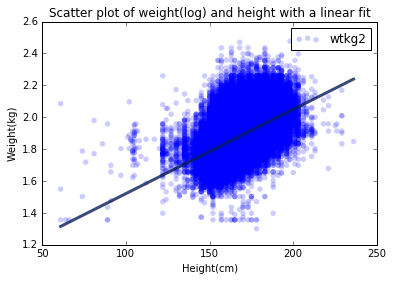

In [23]:
%matplotlib inline
thinkplot.Scatter(height, log_weight)
thinkplot.Plot(fit_xs, fit_ys)
thinkplot.Show(xlabel="Height(cm)",
               ylabel="Weight(kg)",
               title="Scatter plot of weight(log) and height with a linear fit")

The figure shows a scatter plot of weight(log) and height with a linear fitted line. As we can see, the relationship between logged weight and height is in some sense linea. And the fitted line seems like a not bad model of the relationship. But we need to further analyze the graph to get more information

## Residuals plot

Ideally these lines should be flat, indicating that the residuals are random, and parallel, indicating that the variance of the residuals is the same for all age groups. If the lines are curved, it indicates that the relationship is not linear and might be more suitable for other models. In order to plot the residuals, I will use function Residuals() in thinkstats2

[ 0.0284386   0.00775606 -0.02381383 ...,  0.02543252  0.12756008
 -0.05811787]


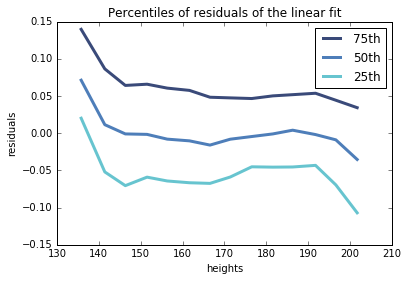

In [43]:
bins = np.arange(135, 210, 5)
indices = np.digitize(df.htm3, bins)
groups = df.groupby(indices)

residuals = thinkstats2.Residuals(height, log_weight, inter, slope)
df['residuals'] = residuals
print residuals


means = [group.htm3.mean() for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residuals) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    weights = [cdf.Percentile(percent) for cdf in cdfs]
    label = "%dth" % percent
    thinkplot.Plot(means, weights, label=label)
    
thinkplot.Config(legend=True, 
                 xlabel="heights",
                 ylabel="residuals",
                 title="Percentiles of residuals of the linear fit")

In fact, the lines are close to parallel from 150 to 190. But it seems that the variance around the head and tail are a bit larger; And they have some curvature, indicating that the relationship is nonlinear. Thus, in this case, linear fit is not very suitable for logged weight vs height. 

## Goodness of fit

To see how much would our linear model helps us in estimating others weight given their hight, I will compute the data's standard deviation of the residuals and the R-square(coefficient of determination)

In [57]:
residuals_esti = thinkstats2.Residuals(height, log_weight, inter, slope)
residuals_none = np.log10(df.wtkg2) - np.log10(df.wtkg2.mean())

RMSE_esti = thinkstats2.Std(residuals_esti)
RMSE_none = thinkstats2.Std(residuals_none)
print "Root mean squared error of the estimation(log weight kg): ", RMSE_esti
print "Root mean squared error of the average guess(log weight kg): ", RMSE_none

Root mean squared error of the estimation(log weight kg):  0.0874077708043
Root mean squared error of the average guess(log weight kg):  0.1032072503


There is a nearly 20 percents difference in the variance between my linear fit and the original. The we proceed to looking at the R-square of the data

In [60]:
R_square = thinkstats2.CoefDetermination(log_weight ,residuals_esti)
print "R-square of the relationship is ", R_square

R-square of the relationship is  0.282734943117


From the two measurement, we can say that using height to predict weight reduces RMSE form 0.1 to 0.087; R-squares shows that height accounts for about 28% of the weight. Since it is quite significant a number, I think the model is somewhat helpful wehn guessing other's weight.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
df['logwt'] = df.wtkg2.apply(math.log)
df = df.dropna(subset=['logwt', 'htm3'])

In [9]:
from sklearn import linear_model
clf = linear_model.LinearRegression()

# Reshape data how sklearn likes
logwt = df.logwt.reshape((len(df), 1))
htm3 = df.htm3.reshape((len(df), 1))

# Fit the data
clf.fit(logwt, htm3)

print "y(x) = %dx + %d" % (clf.coef_[0][0], clf.intercept_)

y(x) = 23x + 68


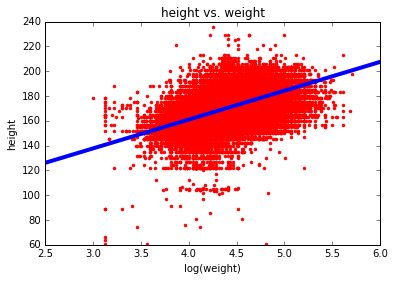

In [10]:
import matplotlib.pyplot as plt
import numpy as np

xs = np.linspace(2.5, 6, 10).reshape((10, 1))
ys = clf.predict(xs)

plt.plot(logwt, htm3, 'r.')
plt.plot(xs, ys, 'b', linewidth=4)
plt.xlabel('log(weight)')
plt.ylabel('height')
plt.title('height vs. weight')
plt.show()

In [23]:
y_pred = clf.predict(logwt).reshape((len(y_pred)))
htm3 = htm3.reshape((len(htm3)))
diff = y_pred - htm3
diff_sq = map(lambda x: x**2, diff)
mean_sq = sum(diff_sq) / len(diff_sq)
rmse = math.sqrt(mean_sq)
print 'RMSE %f' % rmse

RMSE 8.800073


In [27]:
import thinkstats2
r2 = 1 - thinkstats2.Var(y_pred) / thinkstats2.Var(htm3)
print "Coefficient of Determination: %f" % r2
print "p-value: %f" % math.sqrt(r2)

Coefficient of Determination: 0.717265
p-value: 0.846915


## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [ ]:
heights, weights = df.htm3, df.wtkg2

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [11]:
data = brfss.ReadBrfss()

In [12]:
data.dropna(subset = ['wtkg2', 'htm3'], inplace = True)
data['logWt'] = data['wtkg2'].apply(lambda x: np.log(x))
data

,age,sex,wtyrago,finalwt,wtkg2,htm3,logWt
0,82,2,76.363636,185.870345,70.91,157,4.261411
1,65,2,72.727273,126.603027,72.73,163,4.286754
3,61,1,73.636364,517.926275,73.64,170,4.299188
4,26,1,88.636364,1252.624630,88.64,185,4.484583
5,42,1,118.181818,415.161314,109.09,183,4.692173
6,40,2,50.000000,422.810541,50.00,157,3.912023
7,24,2,131.818182,1280.585980,122.73,178,4.809987
8,37,1,87.727273,1245.060440,90.00,178,4.499810
9,65,1,77.272727,382.738158,77.27,173,4.347306
10,28,1,52.272727,3131.561570,63.64,170,4.153242


In [13]:
inter, slope = thinkstats2.LeastSquares(data['logWt'], data['htm3'])
inter, slope

(68.023258993560162, 23.249321436659667)

Okay, so now we have the slope and the intercept, but like the book says, it's not particularlay helpful to know the height of someone whose log(wt) is equal to zero. So, let's convert logWt to actual weight and calculate the heigh for someone of average weight. 

In [14]:
meanLogWt = data.logWt.mean()
calculatedHeight = slope * meanLogWt + inter
meanWt = np.exp(meanLogWt)
meanWt, calculatedHeight

(76.809472494343225, 168.95618848394321)

So, it seems like someone of average weight (76.8 kg) tends to be about 1.69 meters tall! As far as presenting this information, it doesn't make sense to report log weights to people -- it would be very hard for someone to understand/picture how what it means for log weight and height to be related, as well as how actual height and log height are related. It's hard to know what a 'normal' log weight is. 

To answer the question of how much it helps to know height, I'm going to plot what the log weight and height graph looks like, and then plot how weight and height are related. 

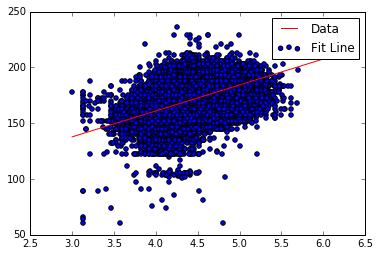

In [15]:
import matplotlib.pyplot as plt

plt.scatter(data['logWt'], data['htm3'])
plt.plot(np.linspace(3,6), slope*np.linspace(3,6)+inter, color = 'r')
plt.legend(['Data','Fit Line'])

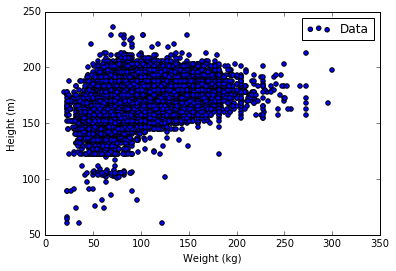

In [16]:
plt.scatter(data['wtkg2'], data['htm3'])
plt.legend(['Data'])
plt.xlabel('Weight (kg)')
plt.ylabel('Height (m)')

Although it seems like weight can tell us quite a bit about the height (although there is some fuzziness), there is a much greater range in weights for any given height than there are heights for any given weight. In other words, it does not help very much to know someone's height to guess their weight. 

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [3]:
# Import data and modules used
import brfss
import numpy as np
import thinkstats2
import thinkplot

# Read data using function and get height & log(weight)
# use dropna to get rid of NANs in data that will mess w function calls
df = brfss.ReadBrfss(nrows = None)
df = df.dropna(subset=['htm3','wtkg2'])
height = df.htm3
weight = np.log10(df.wtkg2)

I will now use Allen's function to generate a least squares regression to obtain the slope and the intercept of the regression line of the data. I will then plot the regressed line over the data points.

In [4]:
# Find intercept and slope 
intercept, slope = thinkstats2.LeastSquares(height,weight)
print "Intercept:", intercept, ", Slope:", slope

Intercept: 0.993080416392 , Slope: 0.00528145416942


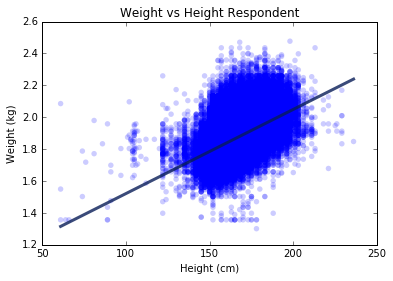

In [5]:
# Plot regression Line over data site
thinkplot.Scatter(height, weight)
regx, regy = thinkstats2.FitLine(height,intercept,slope)
thinkplot.Plot(regx,regy)
thinkplot.Config(title='Weight vs Height Respondent', xlabel='Height (cm)',
                 ylabel='Weight (kg)', legend=False)

I will now plot the residuals of each percentile to show the acurracy of the model. I would want the lines to be parallel with one another. Also I would want the residual values close to zero as possible.

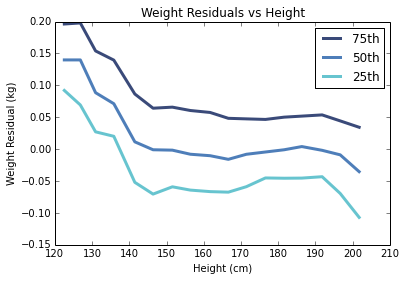

In [5]:
# Calculate residuals of data set using Allen Downey's Function
# the calculated residuals will be added to the data 
#frame as a category for ease of manipulation
resid = thinkstats2.Residuals(height,weight, intercept, slope)
df['residual'] = resid

# create incies and groups for final plot
bins = np.arange(120, 210, 5)
indices = np.digitize(height,bins)
groups = df.groupby(indices)

means = [group.htm3.mean()for i, group in groups][1:-1]
cdfs = [thinkstats2.Cdf(group.residual) for i, group in groups][1:-1]

thinkplot.PrePlot(3)
for percent in [75, 50, 25]:
    ys = [cdf.Percentile(percent) for cdf in cdfs]
    label = '%dth' % percent
    thinkplot.Plot(means, ys, label=label)
    
thinkplot.Config(title='Weight Residuals vs Height',xlabel='Height (cm)', 
                 ylabel='Weight Residual (kg)', legend=True)

I will now see if the linear regression of height to weight log captures the correlation well by calculating the correlation values, coefficient of determination, and the RMSE predictions that do and don't use height. I will then take multiple samples of parts of the data to create many different slope values, analyse that and find the mean.

In [6]:
# Computing Correlation and Correlation of determination
corr = thinkstats2.Corr(height,weight)
coefdet = thinkstats2.CoefDetermination(weight,resid)
print "Correlation:", corr
print "Coefficient of Determination:", coefdet

print "Correlation Squared:", corr**2

Correlation: 0.531728260598
Coefficient of Determination: 0.282734943118
Correlation Squared: 0.282734943119


We observe that the correlation value is 0.53, so the strength of the correlation is about 53%. Also, the coefficient of determination is the square of the correlation, which we proved by comparing.

Afterwards, we will find the RMSE of predictions that do and don't use height, and see how much height influences the RMSE.

In [7]:
# Computing Standard Dev of RMSE predictions that do not use height
std_no_height = thinkstats2.Std(weight)

#Computing Standard Dev of RMSE predictions that do use height, by finding std of resid
std_w_height = thinkstats2.Std(resid)

print "RMSE Prediction without height:", std_no_height
print "RMSE Prediction with height:", std_w_height

RMSE Prediction without height: 0.1032072503
RMSE Prediction with height: 0.0874077708042


In [ ]:
# Computing coef of det (or how much height effects RMSE)
det = 1-std_w_height/std_no_height

print "Height RMSE Effect:", det

Height RMSE Effect: 0.153084976587


Resampling will now be used to create many regression lines for different samples of the dataframe. The varience within the different regressions will be analyzed. Resampling will be done with and without weights. This will help us see how much error is reduced when we consider weight in our regressions.

In [19]:
# Copied Allen's Functions From Thinkstats2

def ResampleRowsWeighted(df, column='wtkg2'):
    weights = df[column]
    cdf = thinkstats2.Cdf(dict(weights))
    indices = cdf.Sample(len(weights))
    sample = df.loc[indices]
    return sample

def Summarize(estimates, actual=None):
    mean = thinkstats2.Mean(estimates)
    stderr = thinkstats2.Std(estimates, mu=actual)
    cdf = thinkstats2.Cdf(estimates)
    ci = cdf.ConfidenceInterval(90)
    print('mean, SE, CI', mean, stderr, ci)

Resampling process for both is done below.

In [20]:
print "No weight"
Summarize([thinkstats2.ResampleRows(df).htm3.mean()for i in range(100)])

print "Weight Added"
Summarize([ResampleRowsWeighted(df).htm3.mean() for i in range(100)])

No weight
('mean, SE, CI', 168.9540444178339, 0.018956577687684686, (168.91608813840216, 168.98444289496555))
Weight Added
('mean, SE, CI', 170.26423136583202, 0.01748826273922107, (170.23565553062915, 170.29949574566987))


Overall we see that standard error decreases with the weights added. Moreover the mean of the height increases for when the weight is added. Weight seems to be an important contributing factor in this regression.

## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [31]:
import brfss as bf
import thinkstats2

In [32]:
df = bf.ReadBrfss()
print df.columns

Index([u'age', u'sex', u'wtyrago', u'finalwt', u'wtkg2', u'htm3'], dtype='object')


In [33]:
weight = df.wtkg2
height = df.htm3

In [34]:
weight.describe()

count    398484.000000
mean         78.992453
std          19.546157
min          20.000000
25%          64.550000
50%          77.270000
75%          90.910000
max         309.090000
Name: wtkg2, dtype: float64

In [35]:
height.describe()

count    409129.000000
mean        168.825190
std          10.352653
min          61.000000
25%         160.000000
50%         168.000000
75%         175.000000
max         236.000000
Name: htm3, dtype: float64

In [37]:
weight = weight.fillna(weight.median())
height = height.fillna(height.median())
inter, slope = thinkstats2.LeastSquares(weight, height)
print inter, slope
res = thinkstats2.Residuals(weight, height, inter, slope)
MSE = sum(res**2)/len(res)
print MSE

147.557600068 0.269327170148
79.1452924237


In [43]:
import math
print math.sqrt(MSE)
# print res

8.89636400018


## Question 1

Using the data from the BRFSS, compute the linear least squares fit for log(weight) versus height. How would you best present the estimated parameters for a model like this where one of the variables is log-transformed? If you were trying to guess someone’s weight, how much would it help to know their height? 

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import thinkstats2
import brfss

df = brfss.ReadBrfss()
df = df.dropna(subset=['wtkg2', 'htm3'])
df['logwt'] = np.log10(df.wtkg2)

In [3]:
heights = df.htm3
log_weights = df.logwt

inter, slope = thinkstats2.LeastSquares(heights, log_weights)
print 'Linear least squares fit: log(weight) = {}*height + {}'.format(slope, inter)

Linear least squares fit: log(weight) = 0.00528145416942*height + 0.993080416394


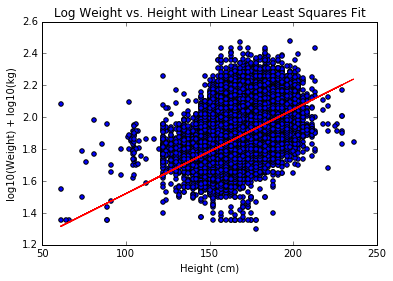

In [4]:
plt.scatter(heights, log_weights)
plt.plot(heights, slope*heights + inter, 'r')
plt.xlabel('Height (cm)')
plt.ylabel('log10(Weight) + log10(kg)')
plt.title('Log Weight vs. Height with Linear Least Squares Fit')

I have no idea what the best way to present this information is with a log-transformed variable.  I tried plotting it first, but that does not seem particularly useful.  I guess I will look at the root mean squared error (RMSE) and coefficient of determination (R$^2$), though I am not sure if they are useful for log-transformed variables.

In [5]:
res = thinkstats2.Residuals(heights, log_weights, inter, slope)

print 'RMSE:'
print 'Without knowing height: ', thinkstats2.Std(log_weights)
print 'With knowing height: ', thinkstats2.Std(res)
print
print 'R-squared: ', thinkstats2.CoefDetermination(log_weights, res)

RMSE:
Without knowing height:  0.1032072503
With knowing height:  0.0874077708042

R-squared:  0.282734943119


Using height data, the RMSE improved by a tiny bit, but this seems rather insignificant.  The R$^2$ value is 0.28, meaning that 28% of the variance in the log weight is accounted for by height.  This does not seem very significant either, but I don't really have an intuition for what a significant R$^2$ value would be, especially with a log-transformed variable involved.